# Idea

Ok, so here we are trying to prototype the workflow for create_summary_spreadsheets.py.

Let's kind of do a dry run with wserv8.

We will want both the cleaned and uncleaned summary spreadsheet, to do some light diagnostics on (and to compare counts, and how much was removed, etc), you know.

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

from wuvars.analysis.variability_selection import spreadsheet_maker


In [4]:
raw_data_path = (
    "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads"
)
cleaned_data_path = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/wserv11/"

wserv8_uncleaned_data = os.path.join(raw_data_path, "wserv11.fits.gz")
wserv8_cleaned_data = os.path.join(cleaned_data_path, "WSERV11_graded_clipped0.95_scrubbed0.1_dusted0.5.h5")

In [5]:
# can pandas load both directly? -> Nope! Gotta go through astropy.table.

# what do we usually do to create a pandas dataframe?

w8_dat = Table.read(wserv8_uncleaned_data, format='fits')
w8_df = w8_dat.to_pandas()

w8_dat_clean = Table.read(wserv8_cleaned_data, format='hdf5')
w8_df_clean = w8_dat_clean.to_pandas()

In [6]:
from datetime import datetime
startTime = datetime.now()

w8_ds = spreadsheet_maker(w8_df)

print(datetime.now() - startTime)

/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/variability_selection.py:223: RuntimeWarning: Mean of empty slice
  d.append(fn(x[column]))
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/variability_selection.py:223: RuntimeWarning: All-NaN axis encountered
  d.append(fn(x[column]))
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/variability_selection.py:184: RuntimeWarning: All-NaN axis encountered
  lambda x: np.nanmax(x) - np.nanmin(x),
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=

1:02:51.507754


In [7]:
from datetime import datetime
startTime = datetime.now()

w8_ds_clean = spreadsheet_maker(w8_df_clean)

print(datetime.now() - startTime)
os.system("python print('\a')")

0:30:38.522014


512

In [9]:
os.system("python print('\a')")

512

In [10]:
w8_ds

mean                                          \
                  MEANMJDOBS        RA       DEC    JMHPNT JMHPNTERR   
SOURCEID                                                               
45195940855819  57727.210340  1.599820 -0.116936       NaN       NaN   
45195940855827  57714.274544  1.599798 -0.118660  0.121282  0.198530   
45195940855830  57717.366641  1.599796 -0.118159  0.266732  0.210657   
45195940855833  57595.608370  1.599800 -0.117279       NaN       NaN   
45195940855837  57718.165313  1.599796 -0.117909  0.222027  0.209142   
...                      ...       ...       ...       ...       ...   
45195940913158  57561.903694  1.601253 -0.103597       NaN       NaN   
45195940913167  57628.355809  1.599954 -0.103458       NaN       NaN   
45195940913172  57452.185633  1.601229 -0.103427       NaN       NaN   
45195940913173  57469.569753  1.601230 -0.103407       NaN       NaN   
45195940913180  57457.579863  1.602422 -0.103346  0.658879  0.090899   

                                                                       ...  \
                  HMKPNT HMKPNTERR  JAPERMAG3 JAPERMAG3ERR  HAPERMAG3  ...   
SOURCEID                                                               ...   
45195940855819       NaN       NaN  19.083769     0.124982  18.856867  ...   
45195940855827       NaN       NaN  18.743710     0.118371  18.547232  ...   
45195940855830 -0.130288  0.358231  19.034389     0.137183  18.766346  ...   
45195940855833  0.561530  0.087621  19.430159     0.164812  17.732712  ...   
45195940855837  0.547632  0.285994  19.031004     0.138969  18.806623  ...   
...                  ...       ...        ...          ...        ...  ...   
45195940913158       NaN       NaN        NaN          NaN        NaN  ...   
45195940913167       NaN       NaN        NaN          NaN        NaN  ...   
45195940913172  0.735191  0.193006        NaN          NaN  18.246113  ...   
45195940913173       NaN       NaN        NaN          NaN  18.237570  ...   
45195940913180  0.546979  0.080261  17.700811     0.069312  16.934978  ...   

                    count                       variability              \
               N_J_severe N_H_severe N_K_severe J_red_chisq H_red_chisq   
SOURCEID                                                                  
45195940855819        0.0        0.0        0.0         NaN    0.028876   
45195940855827        9.0       13.0        0.0    1.029647    0.625786   
45195940855830       42.0       26.0        3.0    1.102222    1.605644   
45195940855833        1.0        5.0       35.0         NaN   36.303406   
45195940855837       44.0       17.0        2.0    1.443704    1.283784   
...                   ...        ...        ...         ...         ...   
45195940913158        0.0        0.0        0.0   -0.000000   -0.000000   
45195940913167        0.0        0.0        0.0   -0.000000   -0.000000   
45195940913172        0.0        0.0        0.0   -0.000000    1.911052   
45195940913173        0.0        0.0        0.0   -0.000000         NaN   
45195940913180       38.0       16.0       48.0   16.430248   48.716931   

                                                                         
               K_red_chisq Stetson_HK Stetson_JK Stetson_JH Stetson_JHK  
SOURCEID                                                                 
45195940855819   -0.000000        NaN        NaN        NaN         NaN  
45195940855827   -0.000000        NaN        NaN   0.519409         NaN  
45195940855830    1.202781  -0.142796  -0.891289   0.283023    1.565002  
45195940855833   24.785360   3.043269        NaN        NaN         NaN  
45195940855837    0.441327        NaN   0.267229   0.637784         NaN  
...                    ...        ...        ...        ...         ...  
45195940913158    0.026685        NaN        NaN        NaN         NaN  
45195940913167    0.699960        NaN        NaN        NaN         NaN  
45195940913172    1.960213        NaN        NaN        N

In [11]:
for item in w8_ds_clean.columns:
    print(item)

('mean', 'MEANMJDOBS')
('mean', 'RA')
('mean', 'DEC')
('mean', 'JMHPNT')
('mean', 'JMHPNTERR')
('mean', 'HMKPNT')
('mean', 'HMKPNTERR')
('mean', 'JAPERMAG3')
('mean', 'JAPERMAG3ERR')
('mean', 'HAPERMAG3')
('mean', 'HAPERMAG3ERR')
('mean', 'KAPERMAG3')
('mean', 'KAPERMAG3ERR')
('mean', 'JPPERRBITS')
('mean', 'HPPERRBITS')
('mean', 'KPPERRBITS')
('mean', 'MERGEDCLASS')
('mean', 'PSTAR')
('mean', 'JGRADE')
('mean', 'HGRADE')
('mean', 'KGRADE')
('median', 'MEANMJDOBS')
('median', 'RA')
('median', 'DEC')
('median', 'JMHPNT')
('median', 'JMHPNTERR')
('median', 'HMKPNT')
('median', 'HMKPNTERR')
('median', 'JAPERMAG3')
('median', 'JAPERMAG3ERR')
('median', 'HAPERMAG3')
('median', 'HAPERMAG3ERR')
('median', 'KAPERMAG3')
('median', 'KAPERMAG3ERR')
('median', 'JPPERRBITS')
('median', 'HPPERRBITS')
('median', 'KPPERRBITS')
('median', 'MERGEDCLASS')
('median', 'PSTAR')
('median', 'JGRADE')
('median', 'HGRADE')
('median', 'KGRADE')
('min', 'MEANMJDOBS')
('min', 'RA')
('min', 'DEC')
('min', 'JMHPNT')

In [12]:
ds = w8_ds_clean

q2_all_indices = (
    (ds["count"]["N_J"] > 50)
    & (ds["count"]["N_J"] < 150)
    & (ds["count"]["N_H"] > 50)
    & (ds["count"]["N_H"] < 150)
    & (ds["count"]["N_K"] > 50)
    & (ds["count"]["N_K"] < 150)
    & (ds["max"]["JPPERRBITS"] == 0)
    & (ds["max"]["HPPERRBITS"] == 0)
    & (ds["max"]["KPPERRBITS"] == 0)
    & (ds["median"]["PSTAR"] > 0.75)
)

In [13]:
np.sum(q2_all_indices)

12022

Text(0, 0.5, 'standard deviation')

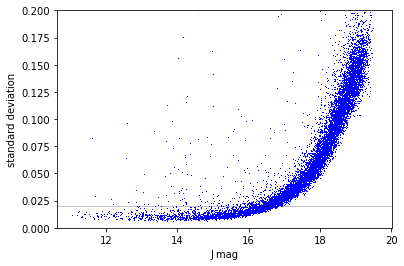

In [14]:
plt.plot(ds['median']['JAPERMAG3'][q2_all_indices], ds['std']['JAPERMAG3'][q2_all_indices], 'b,')
plt.axhline(0, color='k', alpha=0.5, lw=0.5)
plt.axhline(0.02, color='k', alpha=0.5, lw=0.5)
plt.ylim(0, 0.2)

plt.xlabel("J mag")
plt.ylabel("standard deviation")

In [12]:
ds['max']['JAPERMAG3'].min()

9.399102210998535

In [13]:
# Can these 
# w8_df_clean[w8_df_clean == -999999488.0] = np.nan
w8_df_clean

,SOURCEID,MEANMJDOBS,RA,DEC,JMHPNT,JMHPNTERR,HMKPNT,HMKPNTERR,JAPERMAG3,JAPERMAG3ERR,...,KAPERMAG3,KAPERMAG3ERR,JPPERRBITS,HPPERRBITS,KPPERRBITS,MERGEDCLASS,PSTAR,JGRADE,HGRADE,KGRADE
0,44989782425636,56849.626177,0.980061,0.557602,NaN,1.040192e+09,0.832344,1.884656e-01,NaN,1.040192e+09,...,NaN,1.425356e-01,0,32768,32768,1,0.003067,0.903529,0.919580,0.842437
1,44989782425636,56849.629000,0.980061,0.557602,NaN,1.040192e+09,1.121714,2.129889e-01,NaN,1.040192e+09,...,NaN,1.066585e-01,0,0,0,1,0.003067,0.973585,0.762755,0.840764
2,44989782425636,56850.617897,0.980062,0.557604,NaN,1.040192e+09,NaN,1.040192e+09,NaN,1.791137e-01,...,NaN,1.040192e+09,0,0,0,-1,0.900000,0.887588,0.945899,0.989293
3,44989782425636,56850.619583,0.980060,0.557602,NaN,1.040192e+09,0.812544,1.735760e-01,NaN,1.040192e+09,...,17.325947,1.229342e-01,0,0,0,-2,0.486486,0.966667,0.982103,0.968586
4,44989782425636,56853.625150,0.980061,0.557602,NaN,1.040192e+09,NaN,1.040192e+09,NaN,1.040192e+09,...,NaN,1.229759e-01,0,0,0,1,0.050000,0.000000,0.000000,0.896907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647984,44989782510579,57006.276060,0.973811,0.569786,NaN,1.040192e+09,NaN,1.040192e+09,NaN,1.040192e+09,...,18.122734,1.953976e-01,0,0,0,1,0.050000,0.990798,0.987603,0.994778
1647985,44989782510579,57037.250493,0.973811,0.569788,NaN,1.040192e+09,0.918955,2.787633e-01,NaN,1.040192e+09,...,18.110760,1.866906e-01,0,524288,524288,1,0.003067,1.000000,0.993814,1.000000
1647986,44989782510579,57043.280120,0.973811,0.569788,NaN,1.040192e+09,NaN,1.040192e+09,NaN,1.040192e+09,...,17.989620,1.637523e-01,0,0,524288,1,0.050000,0.984710,0.987755,0.994778
1647987,44989782510579,57049.213857,0.973811,0.569786,NaN,1.040192e+09,NaN,1.040192e+09,NaN,1.040192e+09,...,NaN,1.040192e+09,0,0,0,1,0.050000,0.987616,0.997921,0.994681


In [33]:
w8_ds_clean.to_hdf("test_w8_ds.hdf5", key='table', format='table')
w8_ds_clean.to_hdf("test_w8_ds_nottable.hdf5", key='table')

In [34]:
df_from_file = pd.read_hdf("test_w8_ds.hdf5", key='table')
df_from_file2 = pd.read_hdf("test_w8_ds_nottable.hdf5", key='table')

In [39]:
df_from_file2

mean                                              \
                  MEANMJDOBS        RA       DEC    JMHPNT     JMHPNTERR   
SOURCEID                                                                   
45195940855819  57727.210340  1.599820 -0.116936       NaN  1.040192e+09   
45195940855827  57714.274544  1.599798 -0.118660  0.121282  8.090380e+08   
45195940855830  57717.366641  1.599796 -0.118159  0.266732  5.085381e+08   
45195940855833  57595.608370  1.599800 -0.117279       NaN  1.040192e+09   
45195940855837  57718.165313  1.599796 -0.117909  0.222027  6.703458e+08   
...                      ...       ...       ...       ...           ...   
45195940913158  57561.903694  1.601253 -0.103597       NaN  1.040192e+09   
45195940913167  57628.355809  1.599954 -0.103458       NaN  1.040192e+09   
45195940913172  57452.185633  1.601229 -0.103427       NaN  1.040192e+09   
45195940913173  57469.569753  1.601230 -0.103407       NaN  1.040192e+09   
45195940913180  57457.579863  1.602422 -0.103346  0.658879  7.281342e+08   

                                                                            \
                  HMKPNT     HMKPNTERR  JAPERMAG3  JAPERMAG3ERR  HAPERMAG3   
SOURCEID                                                                     
45195940855819       NaN  1.040192e+09  19.083769  7.801438e+08  18.856867   
45195940855827       NaN  1.040192e+09  18.744190  5.200959e+08  18.542000   
45195940855830 -0.130288  9.708456e+08  19.034389  6.934612e+07  18.784706   
45195940855833  0.561530  9.881821e+08  19.430159  1.014187e+09  17.680063   
45195940855837  0.547632  1.017076e+09  19.038671  2.311537e+07  18.806623   
...                  ...           ...        ...           ...        ...   
45195940913158       NaN  1.040192e+09        NaN  1.040192e+09        NaN   
45195940913167       NaN  1.040192e+09        NaN  1.040192e+09        NaN   
45195940913172  0.735191  9.658922e+08        NaN  1.040192e+09  18.246113   
45195940913173       NaN  1.040192e+09        NaN  1.040192e+09  18.237570   
45195940913180  0.546979  7.073304e+08  17.764397  2.496460e+08  16.823833   

                ...      count                       variability              \
                ... N_J_severe N_H_severe N_K_severe J_red_chisq H_red_chisq   
SOURCEID        ...                                                            
45195940855819  ...        0.0        0.0        0.0         NaN    0.026288   
45195940855827  ...        8.0       12.0        0.0    1.052093    0.594018   
45195940855830  ...       42.0       25.0        3.0    0.993174    1.291180   
45195940855833  ...        1.0        4.0       33.0         NaN   30.855754   
45195940855837  ...       43.0       17.0        2.0    1.252554    1.166283   
...             ...        ...        ...        ...         ...         ...   
45195940913158  ...        0.0        0.0        0.0   -0.000000   -0.000000   
45195940913167  ...        0.0        0.0        0.0   -0.000000   -0.000000   
45195940913172  ...        0.0        0.0        0.0   -0.000000    1.712886   
45195940913173  ...        0.0        0.0        0.0   -0.000000         NaN   
45195940913180  ...       29.0        7.0       36.0   10.462281   43.401321   

                                                                         
               K_red_chisq Stetson_HK Stetson_JK Stetson_JH Stetson_JHK  
SOURCEID                                                                 
45195940855819   -0.000000        NaN        NaN        NaN         NaN  
45195940855827   -0.000000        NaN        NaN   0.472869         NaN  
45195940855830    1.106068  -0.103156  -0.850844   0.247940    1.221662  
45195940855833   21.587232   2.150874        NaN        NaN         NaN  
45195940855837    0.404965        NaN   0.262624   0.607537         NaN  
...                    ...        ...        ...        ...         ...  
45195940913158    0.024478        NaN        NaN        NaN         NaN  
45195

In [32]:
w8_ds_clean.to_hdf?